In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the data


# Reference

    1.Mourik, M. W. van et al. rf-induced heating dynamics of noncrystallized trapped ions. Phys Rev A 105, 033101 (2022).
  
\begin{align}
\frac{d^2 \vec r_i^{(rf)}}{dt^2} \approx - \frac{q\nabla V_{rf,0}(\vec r_i^{(sec)})}{m}\cos (\Omega_{rf} t)
\end{align}

we use an iterative approach and initially use the simulated positions $\vec r_i^{(0)}$ as an approximation for the secular motion: $\vec r_i^{(sec)} \approx \vec r_i^{(0)}$. The rf component of the position is then:

\begin{align}
\vec r_i^{(rf)} \approx - \frac{q\nabla V_{rf,0}(\vec r_i^{(0)})}{m\Omega_{rf}^2}\cos (\Omega_{rf} t)
\end{align}

The secular motion is iteratively approximated by removing the rf component from the full simulated positions:

\begin{align}
\vec r_i^{(1)}  &= \vec r_i^{(0)} - \vec r_i^{(rf)} \\
& = \vec r_i^{(0)} + \frac{q\nabla V_{rf,0}(\vec r_i^{(0)})}{m\Omega_{rf}^2}\cos (\Omega_{rf} t)
\end{align}

as $\vec r_i^{(1)}$ is a better approximation for secular motion than $\vec r_i^{(0)}$, we can improve our estimate for $\vec r_i^{(rf)}$. Higher-order adjustments to the secular position can thus be found itera- tively:
\begin{align}
\vec r_i^{(n+1)} = \vec r_i^{(n)} + \frac{q\nabla V_{rf,0}(\vec r_i^{(n)})}{m\Omega_{rf}^2}\cos (\Omega_{rf} t)
\end{align}

Note that Eq. (8) remains an approximation for the secular motion and is not an exact solution even as $n \rightarrow \infty$.

In [5]:
#q = self.ParticleParameters['charge']
#m = self.ParticleParameters['mass']
#wradial = self.TrapParameters['wradial']
#wrf = self.TrapParameters['wrf']
m = 9.10938297e-31 # 9.10938297e-31 kg 
q = 1.6e-19 # 1.6e-19 C
wrf = 2 * np.pi* 10.6e9 # 10 GHz
wradial = 2 * np.pi * 2e9 # 2 GHz  

In [8]:
def Erf(Vec, t):
    """
    Electric field by RF electrode, the position gradient of Vrf

    Params
    ---------
        Vec: 6*1 array
            the vector in the phase space, [x, y, z, vx, vy, vz]
        t: float
    
    Output
    ----------
        Erf: list, size = (3)

    """
    #q = self.ParticleParameters['charge']
    #m = self.ParticleParameters['mass']
    #wradial = self.TrapParameters['wradial']
    #wrf = self.TrapParameters['wrf']
    x, y, z, vx, vy, vz = Vec
    A = m * wradial * wrf * np.cos(wrf * t) * np.sqrt(2) / q
    return A * (- x), A * y, 0.

def Erf_x(x, t):
    A = m * wradial * wrf * np.cos(wrf * t) * np.sqrt(2) / q
    return A * (-x)

def Erf_y(y, t):
    A = m * wradial * wrf * np.cos(wrf * t) * np.sqrt(2) / q
    return A * y

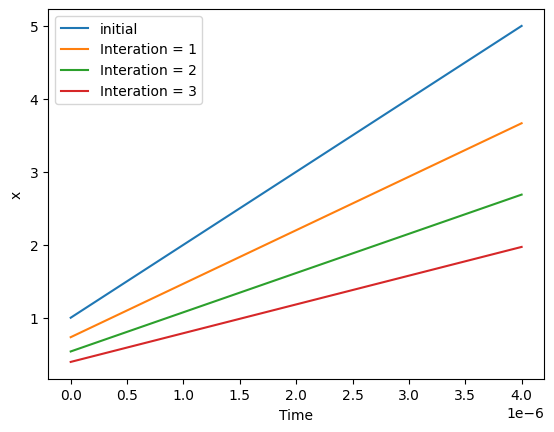

In [10]:
iteration_times = 3
plt.figure()
t = 1e-6 * np.arange(5)
r_x = np.array([1,2,3,4,5])
r_y = np.array([1,2,3,4,5])

r_vx = np.array([1,2,3,4,5])
r_vy = np.array([1,2,3,4,5])

r_old_x = r_x
r_old_y = r_y

r_old_vx = r_vx
r_old_vy = r_vy

plt.plot(t, r_x, label = 'initial')

for iteration_number in np.arange(iteration_times):
    r_new_x = np.array([])
    r_new_y = np.array([])
    r_new_x = r_old_x + q * Erf_x(r_old_x, t) / (m * wrf ** 2) * np.cos(wrf * t)
    plt.plot(t, r_new_x, label = 'Interation = {}'.format(iteration_number + 1))
    r_new_y = r_old_y + q * Erf_x(r_old_y, t) / (m * wrf ** 2) * np.cos(wrf * t)
    r_old_x = r_new_x

plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.show()